In [1]:
import numpy as np
import pandas as pd
import hashlib

import matplotlib.pyplot as plt
from matplotlib import cm

#files_in = ['./data/dlc/e3v813a-20210610T120637-121213DLC_resnet_50_pilot_studyJun15shuffle1_40000_bx_filtered.csv',
#            './data/dlc/e3v813a-20210610T121558-122141DLC_resnet_50_pilot_studyJun15shuffle1_40000_bx_filtered.csv',
#            './data/dlc/e3v813a-20210610T122332-122642DLC_resnet_50_pilot_studyJun15shuffle1_40000_bx_filtered.csv',
#            './data/dlc/e3v813a-20210610T122758-123309DLC_resnet_50_pilot_studyJun15shuffle1_40000_bx_filtered.csv',
#            './data/dlc/e3v813a-20210610T123521-124106DLC_resnet_50_pilot_studyJun15shuffle1_40000_bx_filtered.csv']

#files_in = ['./data/dlc_w_crop/e3v813a-20210610T120637-121213DLC_resnet50_pilot_studyJun15shuffle1_50000_el_filtered.csv',
#            './data/dlc_w_crop/e3v813a-20210610T122758-123309DLC_resnet50_pilot_studyJun15shuffle1_50000_el_filtered.csv',
#            './data/dlc_w_crop/e3v813a-20210610T121558-122141DLC_resnet50_pilot_studyJun15shuffle1_50000_el_filtered.csv',
#            './data/dlc_w_crop/e3v813a-20210610T123521-124106DLC_resnet50_pilot_studyJun15shuffle1_50000_el_filtered.csv',
#            './data/dlc_w_crop/e3v813a-20210610T122332-122642DLC_resnet50_pilot_studyJun15shuffle1_50000_el_filtered.csv']

#fn_out = '/mnt/storage2/blansdel/projects/mabe_final/mabetask1_ml/data/test_inference.npy'

#files_in = ['/home/blansdel/projects/brett_dlc/dlc_projects/pilot_study-Brett-2021-07-19/videos/to_analyze_iteration_3/e3v813a-20210610T120637-121213DLC_resnet50_pilot_studyJul19shuffle1_50000_el_filtered.csv']

files_in = ['/home/blansdel/projects/brett_dlc/dlc_projects/pilot_study-Brett-2021-08-17/videos/to_analyze_2/e3v813a-20210610T120637-121213DLC_resnet50_pilot_studyAug17shuffle1_100000_el_filtered.csv']

files_in = ['/home/blansdel/projects/brett_dlc/dlc_projects/pilot_study-Brett-2021-08-17/videos/to_analyze_2/e3v813a-20210610T120637-121213DLC_resnet50_pilot_studyAug17shuffle1_100000_el_filtered.csv']

fn_out = '/home/blansdel/projects/brett_dlc/dlc_projects/pilot_study-Brett-2021-08-17/test_inference.npy'

In [2]:
pwd

'/home/blansdel/projects/brett_dlc/dlc_projects/pilot_study-Brett-2021-09-24'

In [3]:
test_out = {'sequences':{}}

In [4]:
fn_in = files_in[0]

df = pd.read_csv(fn_in, header = [0,1,2,3])
df.isna().sum()

scorer                                        individuals  bodyparts  coords        0
DLC_resnet50_pilot_studyAug17shuffle1_100000  adult        nose       x             0
                                                                      y             0
                                                                      likelihood    0
                                                           leftear    x             0
                                                                      y             0
                                                                      likelihood    0
                                                           rightear   x             0
                                                                      y             0
                                                                      likelihood    0
                                                           neck       x             0
                                                      

## Filter over low confidence predictions and trajectories that move too fast

In [3]:
speed_threshold = 70
threshold = 0.9 #Confidence threshold
jump_dur = 5
filter_out_lowconf = True
filter_out_toofast = True
#filter_lowconf_method = 'nnmf'
filter_lowconf_method = 'interpolate'

#vid_path ='/home/blansdel/projects/brett_dlc/dlc_projects/pilot_study-Brett-2021-07-19/videos/to_analyze_iteration_3/'
#vid_path ='/home/blansdel/projects/brett_dlc/dlc_projects/pilot_study-Brett-2021-08-17/videos/to_analyze_2/'
#vid_path ='/home/blansdel/projects/brett_dlc/dlc_projects/pilot_study-Brett-2021-08-31/videos/to_analyze/'
#vid_path ='/home/blansdel/projects/brett_dlc/dlc_projects/pilot_study-Brett-2021-08-31/videos/to_analyze_dlcrnet_ms1/'
vid_path ='/home/blansdel/projects/brett_dlc/dlc_projects/pilot_study-Brett-2021-09-24/videos/to_analyze_dlcrnet_ms1/'

#files_in = ['e3v813a-20210610T120637-121213DLC_resnet50_pilot_studyAug17shuffle1_100000_el_filtered.csv']

files_in = ['e3v813a-20210610T120637-121213DLC_dlcrnetms5_pilot_studySep24shuffle1_100000_el_filtered.csv',
            'e3v813a-20210610T121558-122141DLC_dlcrnetms5_pilot_studySep24shuffle1_100000_el_filtered.csv',
            'e3v813a-20210610T122332-122642DLC_dlcrnetms5_pilot_studySep24shuffle1_100000_el_filtered.csv',
            'e3v813a-20210610T122758-123309DLC_dlcrnetms5_pilot_studySep24shuffle1_100000_el_filtered.csv',
            'e3v813a-20210610T123521-124106DLC_dlcrnetms5_pilot_studySep24shuffle1_100000_el_filtered.csv',
            'e3v813a-20210714T091732-092358DLC_dlcrnetms5_pilot_studySep24shuffle1_100000_el_filtered.csv',
            'e3v813a-20210714T092722-093422DLC_dlcrnetms5_pilot_studySep24shuffle1_100000_el_filtered.csv',
            'e3v813a-20210714T094126-094745DLC_dlcrnetms5_pilot_studySep24shuffle1_100000_el_filtered.csv',
            'e3v813a-20210714T095234-095803DLC_dlcrnetms5_pilot_studySep24shuffle1_100000_el_filtered.csv',
            'e3v813a-20210714T095950-100613DLC_dlcrnetms5_pilot_studySep24shuffle1_100000_el_filtered.csv']

#files_in = ['e3v813a-20210610T120637-121213DLC_dlcrnetms5_pilot_studySep24shuffle1_100000_el_filtered.csv']

files_in = [vid_path + fn for fn in files_in]

files_out = [fn.replace('.csv', '.h5') for fn in files_in]

In [4]:
from fancyimpute import KNN, NuclearNormMinimization, BiScaler, SoftImpute, KNN

In [6]:
#Save to new csv file
for fn_in, fn_out in zip(files_in, files_out):
    print("processing", fn_in)
    df = pd.read_csv(fn_in, header = [0,1,2,3], index_col = 0)
    df.columns = df.columns.set_names(['scorer', 'individuals', 'bodyparts', 'coords'])

    df_filter_low_conf = df.copy()
    df_filter_low_conf = df_filter_low_conf.sort_index()

    scorer = ['DLC_dlcrnetms5_pilot_studySep24shuffle1_100000']
    mice = ['juvenile', 'adult']
    bodyparts = ['nose', 'leftear', 'rightear', 'neck', 'lefthip', 'righthip', 'tail']

    if filter_out_lowconf:
        for scr in scorer:
            for m in mice:
                for bp in bodyparts:
                    low_conf = df_filter_low_conf[scr][m][bp]['likelihood'] < threshold
                    df_filter_low_conf.loc[low_conf,(scr, m, bp, 'x')] = np.nan
                    df_filter_low_conf.loc[low_conf,(scr, m, bp, 'y')] = np.nan
                    df_filter_low_conf.loc[low_conf,(scr, m, bp, 'likelihood')] = np.nan

        #And now filter
        if filter_lowconf_method == 'nnmf':
            #df_filter_low_conf = pd.DataFrame(NuclearNormMinimization().fit_transform(df_filter_low_conf.to_numpy()), 
            #                                 index = df_filter_low_conf.index, 
            #                                 columns = df_filter_low_conf.columns)
            
            df_filter_low_conf = pd.DataFrame(KNN(k=7).fit_transform(df_filter_low_conf.to_numpy()), 
                                             index = df_filter_low_conf.index, 
                                             columns = df_filter_low_conf.columns)
            
            #X_incomplete_normalized = BiScaler().fit_transform(df_filter_low_conf.to_numpy())
            #df_filter_low_conf = pd.DataFrame(SoftImpute().fit_transform(X_incomplete_normalized),
            #                                 index = df_filter_low_conf.index,
            #                                 columns = df_filter_low_conf.columns)

        else:
            df_filter_low_conf = df_filter_low_conf.interpolate(axis = 0, method = 'polynomial', order = 1)            
            
    if filter_out_toofast:
        for scr in scorer:
            for m in mice:
                for bp in bodyparts:
                    too_quick = (df_filter_low_conf.loc[:,(scr, m, bp, 'x')].diff(jump_dur).abs() > speed_threshold) | \
                                (df_filter_low_conf.loc[:,(scr, m, bp, 'y')].diff(jump_dur).abs() > speed_threshold) | \
                                (df_filter_low_conf.loc[:,(scr, m, bp, 'x')].diff(-jump_dur).abs() > speed_threshold) | \
                                (df_filter_low_conf.loc[:,(scr, m, bp, 'y')].diff(-jump_dur).abs() > speed_threshold)

                    df_filter_low_conf.loc[too_quick,(scr, m, bp, 'x')] = np.nan
                    df_filter_low_conf.loc[too_quick,(scr, m, bp, 'y')] = np.nan
                    df_filter_low_conf.loc[too_quick,(scr, m, bp, 'likelihood')] = np.nan

        #And now filter again
        df_filter_low_conf = df_filter_low_conf.interpolate(axis = 0, method = 'polynomial', order = 1)
        df_filter_low_conf = df_filter_low_conf.rolling(window = 3).mean()

    df_filter_low_conf.to_hdf(fn_out, "df_with_missing", format = 'table', mode="w")
    df_filter_low_conf.to_csv(fn_out.replace('.h5', '_improved.csv'))

processing /home/blansdel/projects/brett_dlc/dlc_projects/pilot_study-Brett-2021-09-24/videos/to_analyze_dlcrnet_ms1/e3v813a-20210610T120637-121213DLC_dlcrnetms5_pilot_studySep24shuffle1_100000_el_filtered.csv
processing /home/blansdel/projects/brett_dlc/dlc_projects/pilot_study-Brett-2021-09-24/videos/to_analyze_dlcrnet_ms1/e3v813a-20210610T121558-122141DLC_dlcrnetms5_pilot_studySep24shuffle1_100000_el_filtered.csv
processing /home/blansdel/projects/brett_dlc/dlc_projects/pilot_study-Brett-2021-09-24/videos/to_analyze_dlcrnet_ms1/e3v813a-20210610T122332-122642DLC_dlcrnetms5_pilot_studySep24shuffle1_100000_el_filtered.csv
processing /home/blansdel/projects/brett_dlc/dlc_projects/pilot_study-Brett-2021-09-24/videos/to_analyze_dlcrnet_ms1/e3v813a-20210610T122758-123309DLC_dlcrnetms5_pilot_studySep24shuffle1_100000_el_filtered.csv
processing /home/blansdel/projects/brett_dlc/dlc_projects/pilot_study-Brett-2021-09-24/videos/to_analyze_dlcrnet_ms1/e3v813a-20210610T123521-124106DLC_dlcrnetms

In [43]:
# !cp videos/to_analyze_iteration_3/*_improved.csv /mnt/storage2/blansdel/projects/mabe_final/mabetask1_ml/data/dlc_improved
# !cp videos/to_analyze_iteration_3/*labeled.mp4 /mnt/storage2/blansdel/projects/mabe_final/mabetask1_ml/data/dlc_improved/videos

#!cp videos/to_analyze_2/*_improved.csv /mnt/storage2/blansdel/projects/mabe_final/mabetask1_ml/data/dlc_improved
#!cp videos/to_analyze_2/*labeled.mp4 /mnt/storage2/blansdel/projects/mabe_final/mabetask1_ml/data/dlc_improved/videos

#!cp videos/to_analyze/*_improved.csv /mnt/storage2/blansdel/projects/mabe_final/mabetask1_ml/data/dlc_improved
#!cp videos/to_analyze/*labeled.mp4 /mnt/storage2/blansdel/projects/mabe_final/mabetask1_ml/data/dlc_improved/videos

!cp videos/to_analyze_dlcrnet_ms1/*_improved.csv /mnt/storage2/blansdel/projects/mabe_final/mabetask1_ml/data/dlc_improved_aug31_dlcrnetms
!cp videos/to_analyze_dlcrnet_ms1/*labeled.mp4 /mnt/storage2/blansdel/projects/mabe_final/mabetask1_ml/data/dlc_improved_aug31_dlcrnetms/videos

## Project onto PCA components

Extract PCA of poses in high confidence areas... project their poses onto these PCs to cover 'unnatural' positions
arising from low confidence cases

In [ ]:
speed_threshold = 20

for scr in scorer:
    for m in mice:
        for bp in bodyparts:
            too_quick = (df_filter_low_conf.loc[:,(scr, m, bp, 'x')].diff().abs() > speed_threshold) | \
                        (df_filter_low_conf.loc[:,(scr, m, bp, 'y')].diff().abs() > speed_threshold) | \
                        (df_filter_low_conf.loc[:,(scr, m, bp, 'x')].diff(-1).abs() > speed_threshold) | \
                        (df_filter_low_conf.loc[:,(scr, m, bp, 'y')].diff(-1).abs() > speed_threshold)

            df_filter_low_conf.loc[too_quick,(scr, m, bp, 'x')] = np.nan
            df_filter_low_conf.loc[too_quick,(scr, m, bp, 'y')] = np.nan
            df_filter_low_conf.loc[too_quick,(scr, m, bp, 'likelihood')] = np.nan
        
#And now filter
df_filter_low_conf = df_filter_low_conf.interpolate(axis = 0, method = 'polynomial', order = 1)
df_filter_low_conf = df_filter_low_conf.rolling(window = 3).mean()

df_filter_low_conf.to_hdf(fn_out, "df_with_missing", format = 'table', mode="w")

(240, 1250)

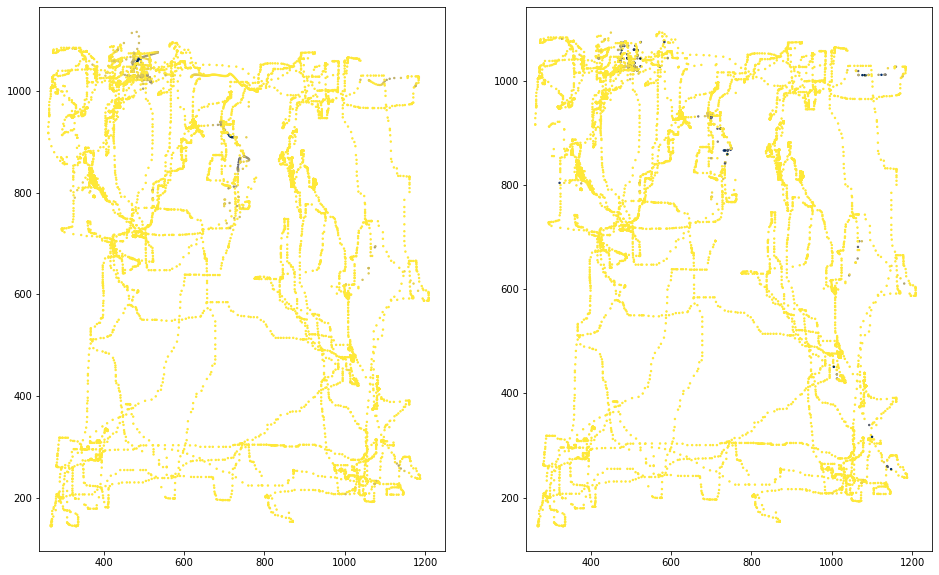

In [55]:
fig, axes = plt.subplots(1, 2, figsize = (16,10))
cmap = plt.get_cmap('cividis')
lhood = np.clip(test_trace_interp_lowconf['nose']['likelihood'], 0, 1)
axes[0].scatter(x = test_trace_interp_lowconf['nose']['x'], y = test_trace_interp_lowconf['nose']['y'], c = lhood, s = 2, cmap = cmap)
axes[0].set_xlim([240, 1250])

axes[1].scatter(x = test_trace['x'], y = test_trace['y'], c = test_trace['likelihood'], s = 2, cmap = cmap)
axes[1].set_xlim([240, 1250])

In [43]:
import deeplabcut
import os

shuffle = 1
track_method = 'ellipse'
#video_path = '/home/blansdel/projects/brett_dlc/dlc_projects/pilot_study-Brett-2021-07-19/videos/to_analyze_iteration_3/'
#video_path = '/home/blansdel/projects/brett_dlc/dlc_projects/pilot_study-Brett-2021-08-17/videos/to_analyze_2/'
#video_path = '/home/blansdel/projects/brett_dlc/dlc_projects/pilot_study-Brett-2021-08-31/videos/to_analyze/'
#video_path = '/home/blansdel/projects/brett_dlc/dlc_projects/pilot_study-Brett-2021-08-31/videos/to_analyze_dlcrnet_ms1/'
video_path = '/home/blansdel/projects/brett_dlc/dlc_projects/pilot_study-Brett-2021-09-24/videos/to_analyze_dlcrnet_ms1/'

# videos_long = ['e3v813a-20210610T120637-121213.avi',
#                 'e3v813a-20210610T121558-122141.avi',
#                 'e3v813a-20210610T122332-122642.avi',
#                 'e3v813a-20210610T122758-123309.avi',
#                 'e3v813a-20210610T123521-124106.avi',
#                 'e3v813a-20210714T091732-092358.avi.re-encoded.1600px.16265k.avi',
#                 'e3v813a-20210714T092722-093422.avi.re-encoded.1600px.16265k.avi',
#                 'e3v813a-20210714T094126-094745.avi.re-encoded.1600px.16265k.avi',
#                 'e3v813a-20210714T095234-095803.avi.re-encoded.1600px.16265k.avi',
#                 'e3v813a-20210714T095950-100613.avi.re-encoded.1600px.16265k.avi']

videos_long = ['e3v813a-20210610T120637-121213.avi',
                'e3v813a-20210610T121558-122141.avi',
                'e3v813a-20210610T122332-122642.avi',
                'e3v813a-20210610T122758-123309.avi',
                'e3v813a-20210610T123521-124106.avi',
                'e3v813a-20210714T091732-092358.avi',
                'e3v813a-20210714T092722-093422.avi',
                'e3v813a-20210714T094126-094745.avi',
                'e3v813a-20210714T095234-095803.avi',
                'e3v813a-20210714T095950-100613.avi']

#videos_short = ['e3v813a-20210610T120637-121213.avi']
#videos_short = ['e3v813a-20210610T122758-123309.avi']

path_config_file = '/home/blansdel/projects/brett_dlc/dlc_projects/pilot_study-Brett-2021-09-24/config.yaml'

#Overwrite with short set of videos
#videos = videos_short
videos = videos_long

for vid in videos:
    os.system(f'rm {video_path}/{vid[:-4]}*.mp4')

videos = [video_path + i for i in videos]

deeplabcut.create_labeled_video(path_config_file, videos, videotype='.avi', 
                        filtered=True, shuffle = shuffle, trainingsetindex = 0, 
                        track_method = track_method, fastmode = True,
                        color_by = 'individual', draw_skeleton = True)

ImportError: Cannot load backend 'WXAgg' which requires the 'wx' interactive framework, as 'headless' is currently running